Problem Statement:

Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

Do ETL: Extract-Transform-Load some Amazon dataset and find Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between attributes. 

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.chdir(r"E:\Data Science Internship")
data = pd.read_csv("Amazon Sales data.csv")
data.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.0,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.8,328376.44,248406.36


In [4]:
data.shape

(100, 14)

In [6]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [23]:
data.loc[:,["Total Revenue","Total Profit"]].iloc[:]

,Total Revenue,Total Profit
0,2533654.00,951410.50
1,576782.80,248406.36
2,1158502.59,224598.75
3,75591.66,19525.82
4,3296425.02,639077.50
5,759202.72,285087.64
6,2798046.49,693911.51
7,1245112.92,510216.66
8,496101.10,152114.20
9,1356180.10,584073.87


In [8]:
# Changing the data types of different columns 

data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

In [9]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [10]:
# Checking the frequency distributions of numerical variables 

data[["Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [11]:
# Adding new columns to dataframe which contain only month, year and month with year

data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')
data = data.drop(columns=['Order Date'])

In [12]:
# Checking for missing value

data.isnull().mean() * 100

Region                  0.0
Country                 0.0
Item Type               0.0
Sales Channel           0.0
Order Priority          0.0
Order ID                0.0
Ship Date               0.0
Units Sold              0.0
Unit Price              0.0
Unit Cost               0.0
Total Revenue           0.0
Total Cost              0.0
Total Profit            0.0
Order Month             0.0
Order Year              0.0
Order Date MonthYear    0.0
dtype: float64

In [13]:
# Displaying total values of all country

pd.set_option('display.max_rows', None)
data['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

In [14]:
country_names = data.Country.value_counts().index
country_val = data.Country.value_counts().values

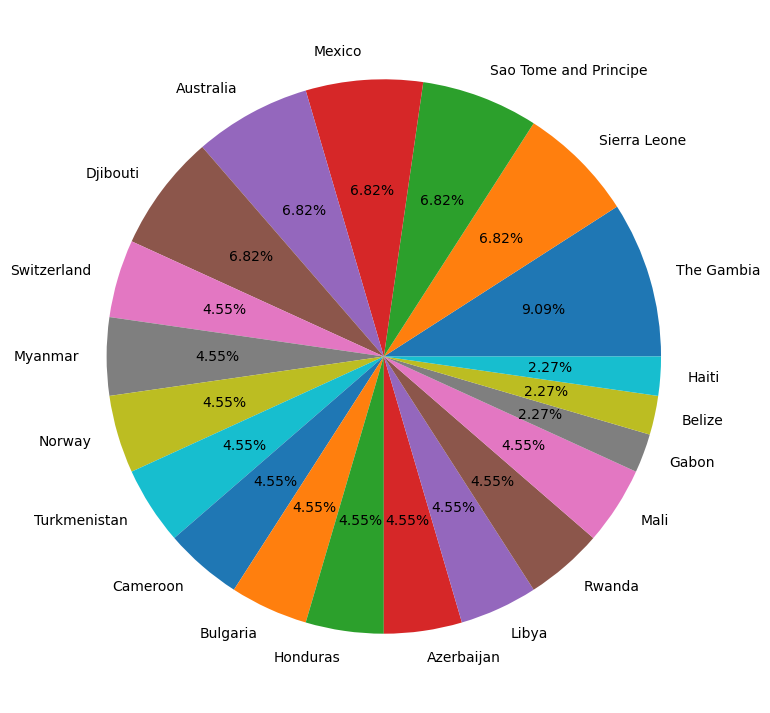

In [15]:
# Pie Chart for top 20 country

fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

Text(0, 0.5, 'Total Revenue')

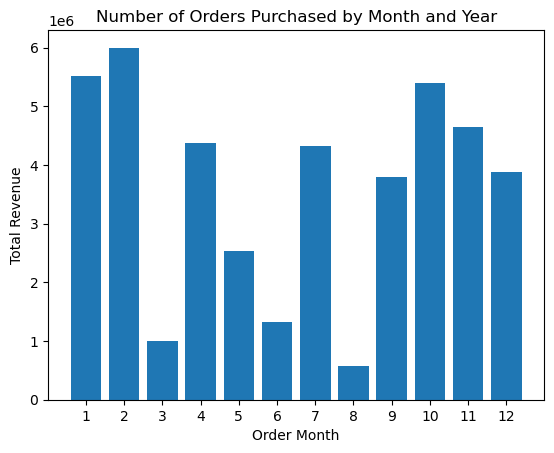

In [16]:
# Creating a bar chart for Total Revenue and Order Month

plt.bar(data['Order Month'], data['Total Revenue'])
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

Text(0.5, 1.0, 'Profit per year')

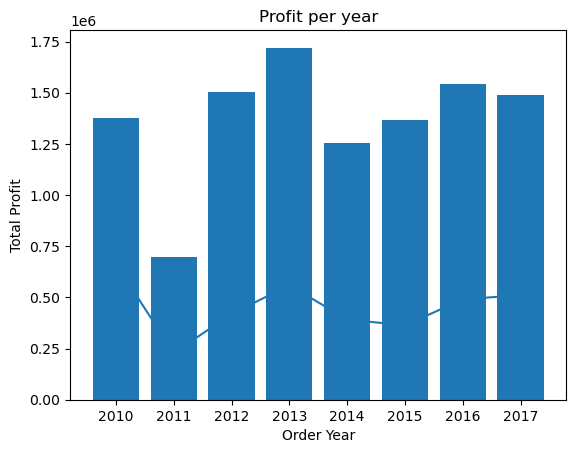

In [17]:
# Creating a bar chart of Total Profit and Order Year

plt.bar(data['Order Year'], data['Total Profit'])
data.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

Text(0.5, 1.0, 'Profit per year')

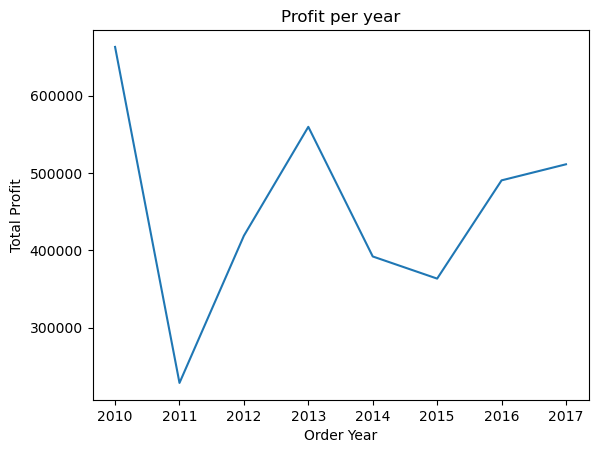

In [21]:
# Plot line graph of Total Profit and Order Year

data.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [18]:
# Calculating the total revenue for each group with respect to Item Type 

revenue_by_category = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [19]:
# Calculating the total profit for each group with respect to Item Type

profit_by_category = data.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [20]:
# Calculating the Units Sold for each group with respect to Item Type

profit_by_category = data.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          83718
Clothes            71260
Beverages          56708
Fruits             49998
Personal Care      48708
Office Supplies    46967
Household          44727
Baby Food          40545
Cereal             25877
Vegetables         20051
Snacks             13637
Meat               10675
Name: Units Sold, dtype: int64

In [24]:
np.average(data['Total Profit'])

441681.98399999994

In [25]:
np.max(data['Total Profit'])

1719922.04

In [26]:
np.min(data['Total Profit'])

1258.02

In [27]:
np.max(data['Total Revenue'])

5997054.98

In [28]:
np.min(data['Total Revenue'])

4870.26

In [29]:
np.mean(data['Total Revenue'])

1373487.6830999998

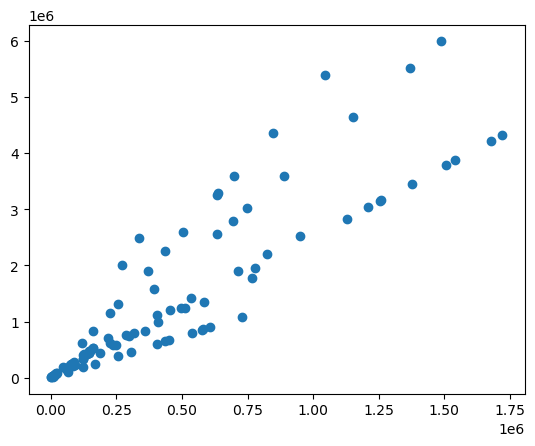

In [31]:
plt.scatter(data['Total Profit'],data['Total Revenue'])

<AxesSubplot:xlabel='Item Type'>

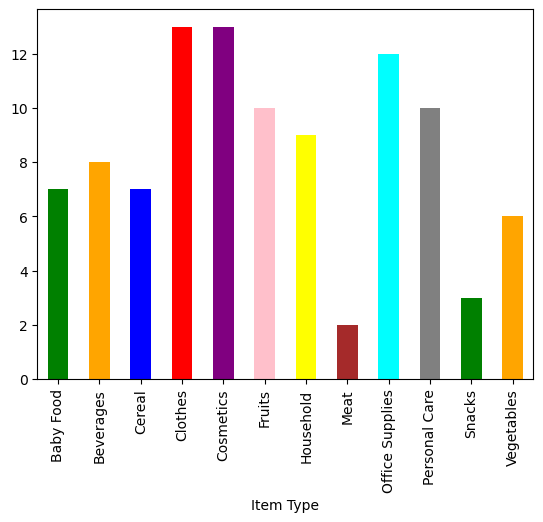

In [34]:
data.groupby('Item Type')['Total Revenue'].count().plot(kind='bar',color=['green','orange','blue','red','purple','pink','yellow','brown','aqua','grey'])

<AxesSubplot:xlabel='Item Type'>

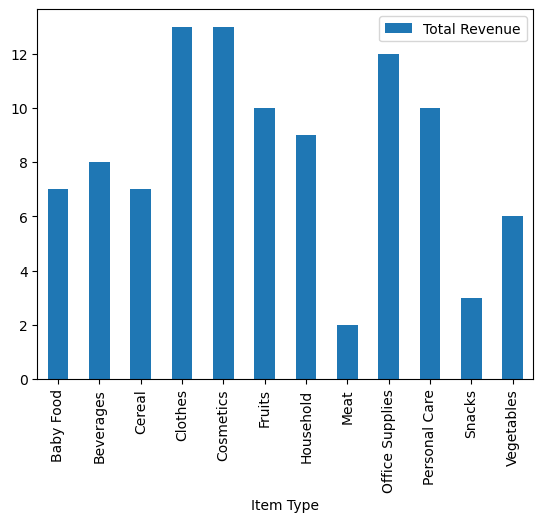

In [35]:
pd.pivot_table(data,values='Total Revenue',index='Item Type',aggfunc='count').plot(kind='bar')

Text(0.5, 0, 'Units Sold')

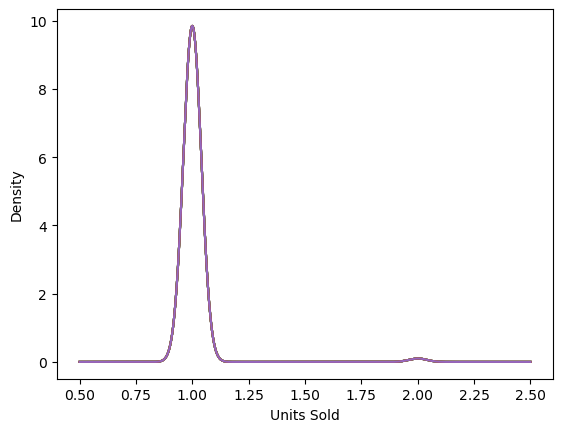

In [37]:
# Using kde plot to check the highest units sold

pd.pivot_table(data,index='Units Sold',aggfunc='count').plot(kind='kde',stacked=True,legend=None)
plt.xlabel('Units Sold')

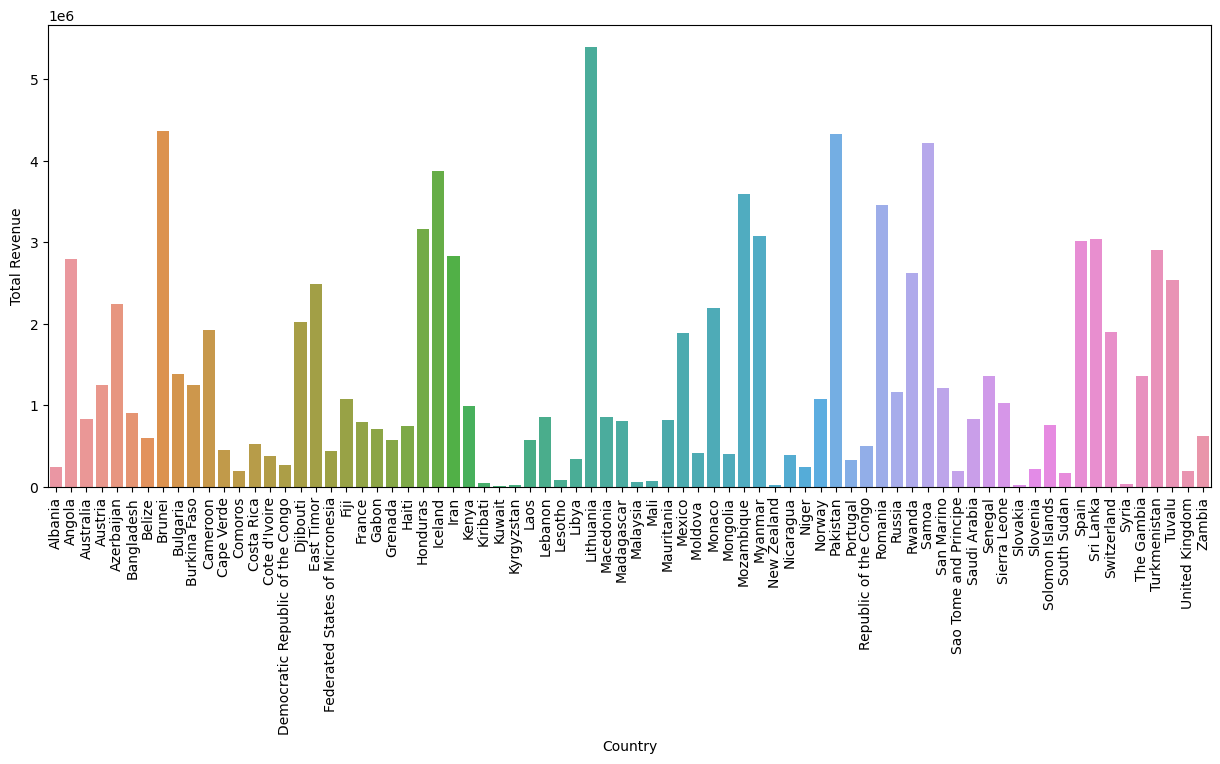

In [40]:
# Checking the total revenue for each country

data['Country'] = pd.Categorical(data['Country'],ordered=True)
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='Total Revenue', data=data, ci=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

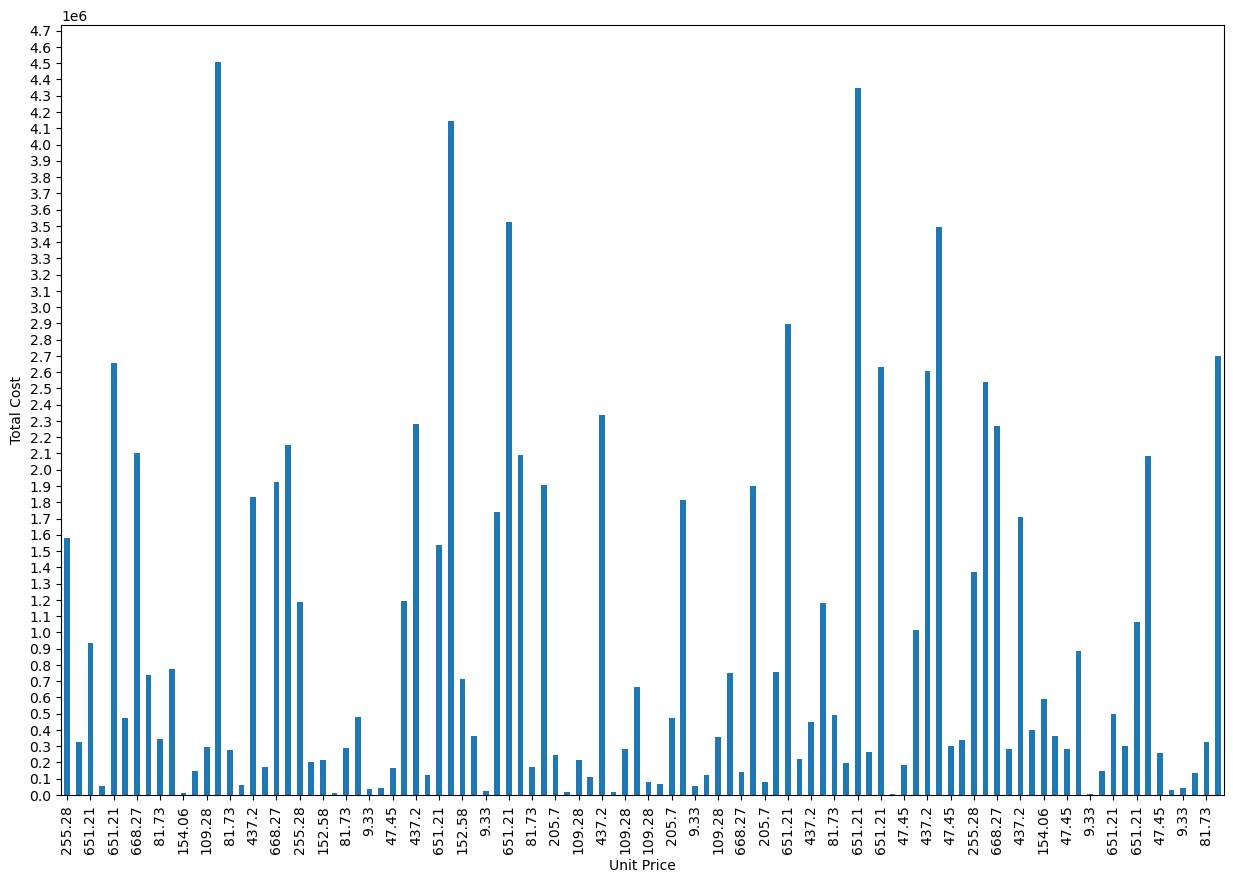

In [41]:
# Total cost varies as per the unit price

data.plot.bar(x='Unit Price',y='Total Cost',legend=None,figsize=(15,10),rot=0)
plt.ylabel('Total Cost')
plt.xticks(rotation=90)
plt.locator_params(nbins=90)

In [45]:
# Distribution of item types percentage

labels = data['Item Type'].value_counts().index

sizes = data['Item Type'].value_counts().values
colors = ['grey','blue','red','lime','purple','brown']

Text(0.5, 1.0, 'Distribution of Item Types')

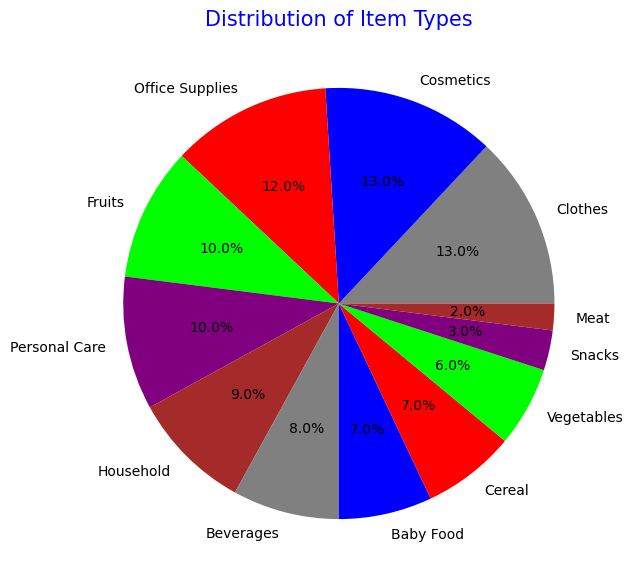

In [46]:
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Distribution of Item Types',fontsize=15,color='blue')